In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [108]:
df = pd.read_csv('CAST021.CSV').iloc[1:]

In [109]:
df

,Date,Time,Pressure,Temp A,Temp B,Temp C,Conductivity
1,03/30/2025,11:31:10,993.6,8.13,8.31,8.06,310.7
2,03/30/2025,11:31:11,994.0,8.13,8.31,8.06,295.6
3,03/30/2025,11:31:12,993.7,8.19,8.31,8.06,305.9
4,03/30/2025,11:31:13,993.9,8.19,8.31,8.06,299.6
5,03/30/2025,11:31:14,993.7,8.19,8.31,8.06,304.4
...,...,...,...,...,...,...,...
510,03/30/2025,11:39:34,993.2,7.69,7.81,7.56,6293.0
511,03/30/2025,11:39:35,992.9,7.69,7.81,7.56,6302.0
512,03/30/2025,11:39:36,993.0,7.69,7.81,7.56,6294.0
513,03/30/2025,11:39:37,993.0,7.69,7.87,7.62,6282.0


In [131]:
t = (df['Temp A'] + df['Temp B'] + df['Temp C']) / 3

surface_p = df.Pressure.min()
h = 100 * (df.Pressure - surface_p) / 9810
h_smooth = 100 * (df.Pressure.rolling(5, center=True).mean() - surface_p) / 9810
h_sign = np.gradient(h_smooth)

ref_cond = 42900
cond = df.Conductivity / ref_cond
rt = 0.6766097 + 0.0200564 * t + 0.0001104259 * t**2 + (-6.9698e-7)*t**3+(1.0031e-9)*t**4
Rt = cond / rt
dS = (( (t-15) / (1+0.0162 * (t-15))) *
    (0.0005 + 
     (-0.0056)*Rt ** 0.5 + 
     (-0.0066)*Rt + 
     (-0.0375)*Rt**1.5 + 
     (0.0636)*Rt ** 2 + 
     (-0.0144) * Rt**2.5)
     )
sal = 0.008+(-0.1692) * Rt**0.5+25.3851 * Rt+14.0941*Rt**1.5+(-7.0261)*Rt**2+2.7081*Rt**2.5+dS

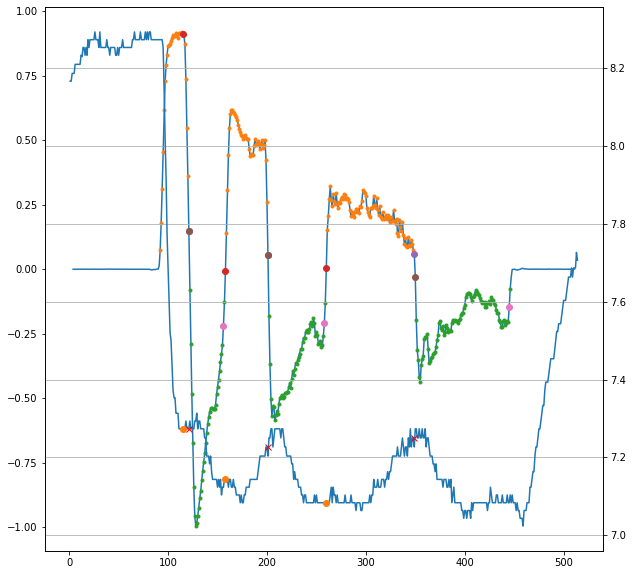

In [187]:
dp_limit = 0.05
fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.plot(df.index, h_sign)
ax.plot(df.index[h_sign > dp_limit], h_sign[h_sign > dp_limit], ".")
ax.plot(df.index[h_sign < -dp_limit], h_sign[h_sign < -dp_limit], ".")

start_down_idx = np.nonzero(np.diff(np.array(h_sign > dp_limit, int)) > 0)[0]+0
stop_down_idx = np.nonzero(np.diff(np.array(h_sign > dp_limit, int)) < 0)[0]-0

start_up_idx = np.nonzero(np.diff(np.array(h_sign < -dp_limit, int)) > 0)[0]+0
stop_up_idx = np.nonzero(np.diff(np.array(h_sign < -dp_limit, int)) < 0)[0]-1

start_down_idx[0] = 114

ax.plot(df.index[start_down_idx], h_sign[start_down_idx], 'o')
ax.plot(df.index[stop_down_idx], h_sign[stop_down_idx], 'o')

ax.plot(df.index[start_up_idx], h_sign[start_up_idx], 'o')
ax.plot(df.index[stop_up_idx], h_sign[stop_up_idx], 'o')


ax = ax.twinx()
ax.plot(df.index, t)
ax.plot(df.index[start_down_idx], t[start_down_idx], "o")
ax.plot(df.index[stop_down_idx], t[stop_down_idx], "rx")
plt.grid("on")

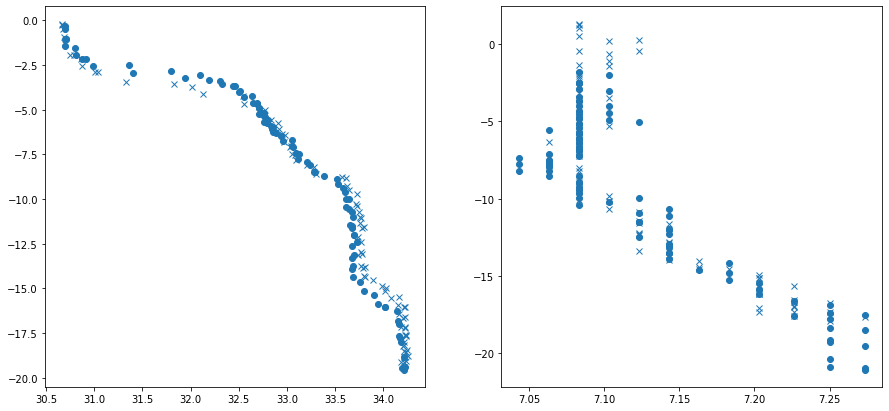

In [195]:
depth_compensation = [5, 3, 1.5]
depth_compensation = [5, 3, 1.5]

fig, ax = plt.subplots(1, 2, figsize=(15,7))

for i in [2]:
    i0, i1 = start_down_idx[i], stop_down_idx[i]
    l = ax[0].plot(sal[i0:i1], -h[i0:i1], "x")
    l = ax[1].plot(t[i0:i1], -h[i0:i1] + depth_compensation[i] , "x")
    
    i0, i1 = start_up_idx[i], stop_up_idx[i]
    l = ax[0].plot(sal[i0:i1], -h[i0:i1], "o", color=l[0].get_color())
    l = ax[1].plot(t[i0:i1], -h[i0:i1] - depth_compensation[i], "o", color=l[0].get_color())
    
    #i0, i1 = start_down_idx[i], stop_down_idx[i]
    #l = ax[2].plot(sal[i0:i1], t[i0:i1], "x", color=l[0].get_color())
    #i0, i1 = start_up_idx[i], stop_up_idx[i]
    #l = ax[2].plot(sal[i0:i1], t[i0:i1], "o", color=l[0].get_color())
    